# Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading in the Data

In [2]:
df = pd.read_csv('./DATA/sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# ML Preprocessing

### Feature-Target Split

In [4]:
X = df.drop(['Label'],axis=1)
y = df['Label']

### Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split 

X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Machine Learning Model 

### Pipeline Creation

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

### Grid Search - Testing of Different k values

In [7]:
from sklearn.model_selection import GridSearchCV

k_values = list(range(1,30))
param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

full_cv_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [8]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

### Mean k Scores v/s value Plot

In [9]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

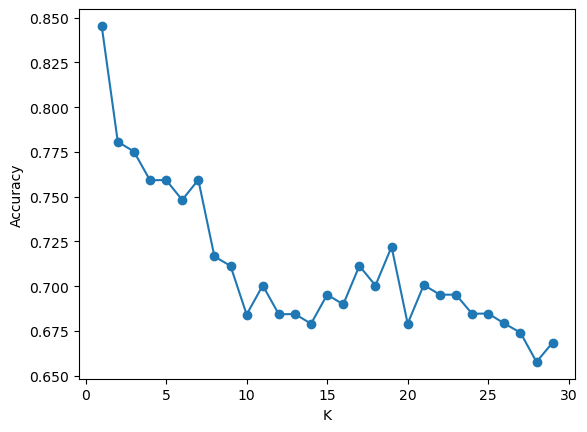

In [10]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

# Model Evaluation

### Predicting on Test Set

In [11]:
pred = full_cv_classifier.predict(X_test)

In [12]:
full_cv_classifier.predict_proba(X_test.iloc[:1])

array([[1., 0.]])

### Confusion Matrix and Classification Report

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

confusion_matrix(y_test,pred)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [14]:
accuracy_score(y_test, pred)

0.9047619047619048

In [15]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [17]:
from sklearn.metrics import roc_auc_score
y_pred_proba = full_cv_classifier.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score:", auc_score)

AUC-ROC Score: 0.8990384615384616


# Model Saving using .pkl

In [19]:
import pickle

with open('./Models/mine_or_rock.pkl', 'wb') as file:
    pickle.dump(full_cv_classifier, file)

# Model Explainability using LIME

Intercept 0.3239801733606089
Prediction_local [0.35178798]
Right: 0.0


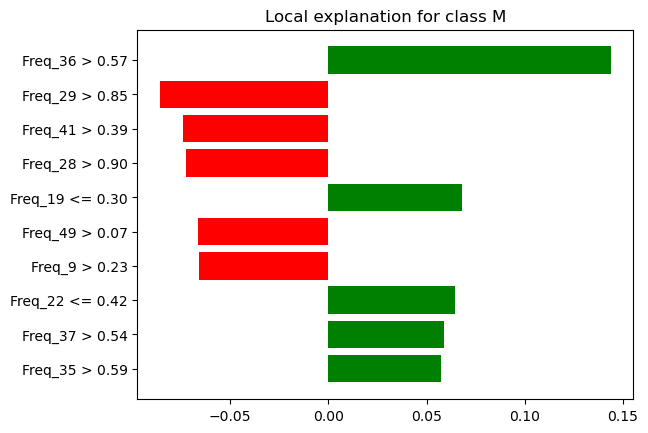

In [20]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Fix 1: Set correct class names (binary example: 0 = No, 1 = Yes)
explainer = LimeTabularExplainer(
    training_data=X_cv.values,
    feature_names=X.columns,
    class_names=['R', 'M'],  # ← use actual class names
    mode='classification',
    verbose=True
)

def lime_predict_fn(x):
    df = pd.DataFrame(x, columns=X.columns)
    return full_cv_classifier.predict_proba(df)

explanation = explainer.explain_instance(
    X_test.iloc[0].values,
    lime_predict_fn
)

label_to_plot = explanation.available_labels()[0]  

fig = explanation.as_pyplot_figure(label=label_to_plot)
fig.patch.set_facecolor('white')  # white background for dark notebooks
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.show()


This model explains the important frequencies and rows, that direct the model's predictions. The value of Freq_36 being greater than 0.57, and Freq_35 being greater than 0.59 pushes the model to make a prediction that the frequencies are from a mine. The same goes for Freq_41 and Freq_49, which when being greater than 0.39 and 0.07, will push the model towards predicting that the signal comes from a rock.